In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix

## Preparing Data

In [11]:
df = pd.read_csv('diabetes.csv')

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=105)

## Random Forest

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
rf_pred = rf.predict(X_test)

print(classification_report(y_test,rf_pred))

print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       153
           1       0.69      0.51      0.59        78

    accuracy                           0.76       231
   macro avg       0.74      0.70      0.71       231
weighted avg       0.75      0.76      0.75       231

[[135  18]
 [ 38  40]]


### Changing n_estimator 

In [156]:
error_rate_rf = []

# Will take some time
for i in range(1,20):
    
    rf = RandomForestClassifier(n_estimators=10*i)
    rf.fit(X_train,y_train)
    pred_i = rf.predict(X_test)
    error_rate_rf.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

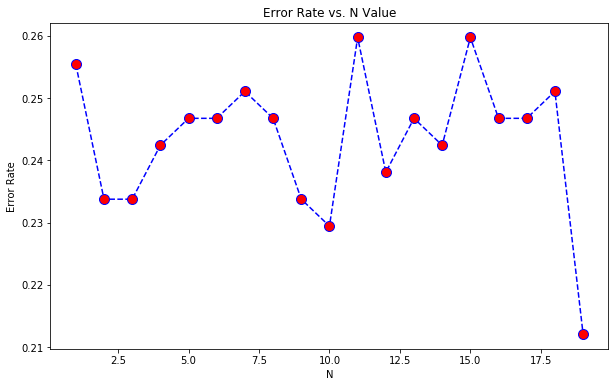

In [157]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate_rf,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [158]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print(classification_report(y_test,rf_pred))

print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       153
           1       0.66      0.53      0.59        78

    accuracy                           0.75       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231

[[132  21]
 [ 37  41]]


## SVM

In [159]:
model = SVC()
model.fit(X_train,y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [160]:
svc_pred = model.predict(X_test)

In [161]:

print(confusion_matrix(y_test, svc_pred))

print(classification_report(y_test, svc_pred))

[[136  17]
 [ 44  34]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       153
           1       0.67      0.44      0.53        78

    accuracy                           0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231



In [162]:
param_grid = {'C': [0.1, 0.5, 1, 2, 5, 10, 100]} 

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [165]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.630, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.639, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.654, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.682, total=   0.0s
[CV] C=0.1 ...........................................................
[CV] ............................... C=0.1, score=0.654, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.796, total=   0.0s
[CV] C=0.5 ...........................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................................. C=1, score=0.720, total=   0.0s
[CV] C=1 .............................................................
[CV] ................................. C=1, score=0.729, total=   0.0s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.824, total=   0.0s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.704, total=   0.0s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.794, total=   0.0s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.729, total=   0.0s
[CV] C=2 .............................................................
[CV] ................................. C=2, score=0.720, total=   0.0s
[CV] C=5 .............................................................
[CV] .

[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [166]:
grid.best_params_

{'C': 1}

In [167]:
grid_predictions = grid.predict(X_test)

In [168]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       153
           1       0.67      0.44      0.53        78

    accuracy                           0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.73      0.74      0.72       231



In [169]:
print(confusion_matrix(y_test,grid_predictions))

[[136  17]
 [ 44  34]]


In [170]:
print(confusion_matrix(y_test,svc_pred))

[[136  17]
 [ 44  34]]
